In [1]:
import numpy as np
import os
from moviepy.editor import VideoFileClip
from skimage.measure import label, regionprops

from matplotlib import pyplot as plt

%matplotlib inline

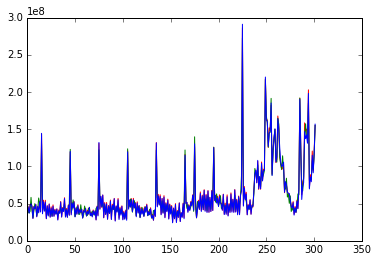

In [61]:
plt.plot(dfs[:, 0], 'r', dfs[:, 1], 'g', dfs[:, 2], 'b')

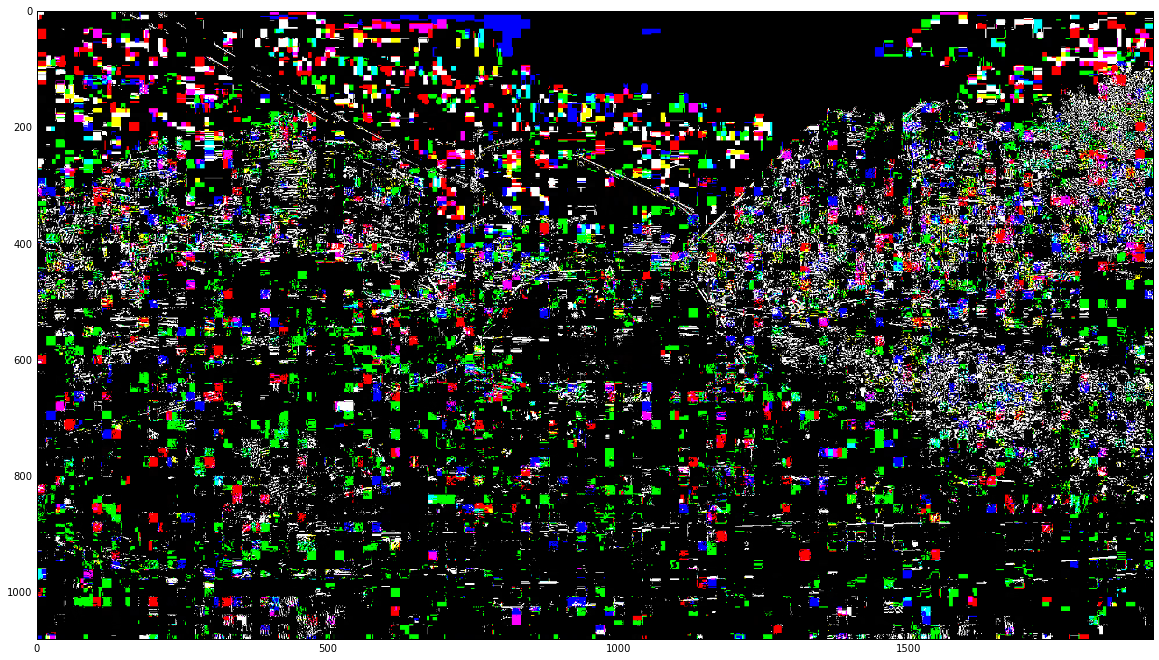

In [78]:
plt.figure(figsize = (20,20))
plt.imshow(fs[16] - fs[15])

In [4]:
class Find(Exception):
    pass

def detector(video, threshold_color=60, threshold_size_min=80, threshold_size_max=4 * 1e4, traffic_lights_distance_max=4):
    def region_checker(region):
        min_r, min_c, max_r, max_c = region.bbox
        if (0.4 < ((max_c - min_c) / float(max_r - min_r)) < 2.2) and threshold_size_min < region.area < threshold_size_max:
            return True
        return False
    
    dfs = video[1:] - video[:-1]
    mask1 = (dfs[:, :, :, 1:] > threshold_color).any(3)
    mask2 = (dfs[:, :, :, 0] < -threshold_color)
    try:
        for i, frame2 in enumerate(mask2):
            label_im = label(frame2)
            objs = [[region.centroid, region.area] for region in regionprops(label_im) if region_checker(region)]
            if len(objs):
                objs2 = []
                for frame1 in mask1[i-4:i+4]:
                    label_im = label(frame1)
                    objs2 += [[region.centroid, region.area] for region in regionprops(label_im) if region_checker(region)]
                for cors, area in objs:
                    r, c = cors
                    d = 2 * np.sqrt(area / np.pi)
                    for cors2, area2 in objs2:
                        r2, c2 = cors2
                        if (np.abs(r - r2) < d * 0.3) and (d * 1.5 < c2 - c < traffic_lights_distance_max * d) and ( 0.75 < area / float(area2) < 1.3):
                            dif_area = area / float(area2)
                            raise Find
        i = -1
        dif_area = 0
    except Find:
        pass
    return i, dif_area

In [79]:
v = VideoFileClip('{}/{}'.format('trainset', 'akn.222.075.left.avi'))
fs = np.array([i for i in v.iter_frames()], dtype=np.int32)
i, ar = detector(fs)
i, ar

(38, 0.99212598425196852)

In [5]:
videos =[]
res = []
path = 'trainset'
path_to = 'train'
for file_v in os.listdir('trainset'):
    if file_v.find('.avi') > 0:
        v = VideoFileClip('{}/{}'.format(path, file_v))
        fs = np.array([i for i in v.iter_frames()], dtype=np.int32)
        i, ar = detector(fs)
#         videos.append(np.array([i for i in v.iter_frames()]))
#         np.save('{}/{}'.format(path_to, file_v), np.array([i for i in v.iter_frames()]))
        del v
        res.append([file_v,i])
        print 'made ', file_v, i

made  akn.002.014.left.avi 44
made  akn.002.040.left.avi 107
made  akn.002.078.left.avi -1
made  akn.002.084.left.avi 173
made  akn.002.098.left.avi 16
made  akn.002.135.left.avi 277
made  akn.003.023.left.avi -1


KeyboardInterrupt: 

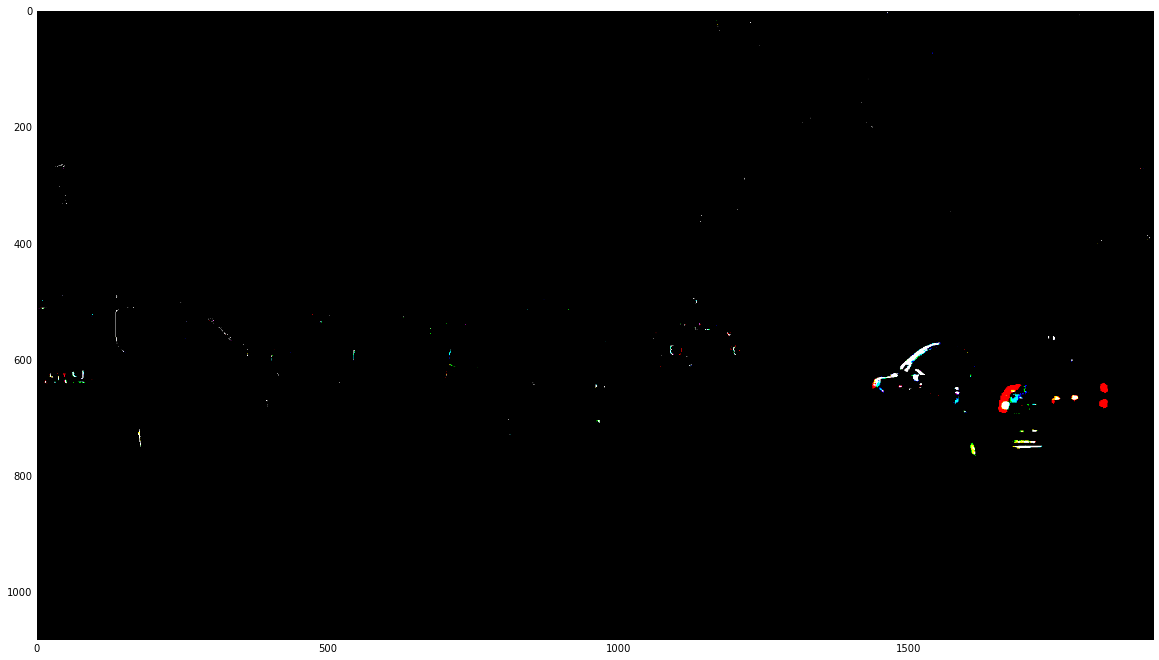

In [74]:

f = (fs[i] - fs[i-1] > 30)
plt.figure(figsize = (20,20))
plt.imshow(f)